# 데이터 필터링 - Boolean Indexing
- Series/DatFrame에서 원하는 조건의 데이터만 추출하기 위한 것
- True와 False로 구성된 데이터 ==> 인덱스로 사용

dict는 mapping 데이터 타입

-iterable도 맞음

In [ ]:
import pandas as pd

In [ ]:
data={'name':['마징가','배트맨','홍길동'],'age':[25,31,19],'gender':['남','남','여']}

In [ ]:
data_df=pd.DataFrame(data)

data_df

,name,age,gender
0,마징가,25,남
1,배트맨,31,남
2,홍길동,19,여


In [ ]:
# 데이터 추출
# (1) 성별이 남자인 데이터만

print(data_df['gender']=='남')
print()

data_df[data_df['gender']=='남']

0     True
1     True
2    False
Name: gender, dtype: bool



,name,age,gender
0,마징가,25,남
1,배트맨,31,남


In [ ]:
# (2) 20세 이상의 남자 데이터만 추출

print((data_df['age']>=20) & (data_df['gender']=='남'))
print()

bool_index=(data_df['age']>=20) & (data_df['gender']=='남')

data_df[bool_index]

0     True
1     True
2    False
dtype: bool



,name,age,gender
0,마징가,25,남
1,배트맨,31,남


In [ ]:
# (3) 20세 이하 이거나 성별이 남자인 데이터만 추출

data_df[(data_df['age']<=20) | (data_df['gender']=='남')]

mask=(data_df['age']<=20) | (data_df['gender']=='남')
# 주로 mask 변수에 저장

,name,age,gender
0,마징가,25,남
1,배트맨,31,남
2,홍길동,19,여


In [ ]:
# (4) 성별이 남자인 데이터만 추출

data_df[data_df['gender']=='남']

,name,age,gender
0,마징가,25,남
1,배트맨,31,남


In [ ]:
# (4) 성별이 남자가 아닌 데이터만 추출

print(~ (data_df['gender']=='남'))
print()

print(data_df[~(data_df['gender']=='남')])
print()

print(data_df[(data_df['gender']!='남')])

0    False
1    False
2     True
Name: gender, dtype: bool

  name  age gender
2  홍길동   19      여

  name  age gender
2  홍길동   19      여


isin : 안에 요소가 있는지 확인

~ isin

# CSV 데이터 파일 다루기
- auto_mpg 데이터 파일 살펴보기

In [ ]:
file_name='/content/drive/MyDrive/KDT AI, 빅데이터 전문가 양성과정/data/auto_mpg.csv'

In [ ]:
mpg_df=pd.read_csv(file_name)
mpg_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
mpg_df1=pd.read_csv(file_name,nrows=10, usecols=[0,2,4,6,8])
mpg_df1

,mpg,displacement,weight,model year,car name
0,18,307,3504,70,chevrolet chevelle malibu
1,15,350,3693,70,buick skylark 320
2,18,318,3436,70,plymouth satellite
3,16,304,3433,70,amc rebel sst
4,17,302,3449,70,ford torino
5,15,429,4341,70,ford galaxie 500
6,14,454,4354,70,chevrolet impala
7,14,440,4312,70,plymouth fury iii
8,14,455,4425,70,pontiac catalina
9,15,390,3850,70,amc ambassador dpl


In [ ]:
print(f'데이터 행수 : {mpg_df.shape[0]}, 열 수 : {mpg_df.shape[1]}')
print()

print(f'데이터 컬럼 : {mpg_df.columns}')
print()

print(f'데이터 인덱스 : {mpg_df.index}')
print()

print(f'데이터 타입 : {mpg_df.dtypes}') # 컬럼마다 알려줌
print()


데이터 행수 : 398, 열 수 : 9

데이터 컬럼 : Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

데이터 인덱스 : RangeIndex(start=0, stop=398, step=1)

데이터 타입 : mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object



In [ ]:
# [5-1] 70년대 자동차 데이터만 추출

print(mpg_df[mpg_df['model year']>=70].shape)
print()

mpg_df[mpg_df['model year']>=70]




(398, 9)



,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
# =>

print(mpg_df[mpg_df['model year']%70<10])
print()

print(mpg_df[(mpg_df['model year']>=70) & (mpg_df['model year']<80)])
print()

print(mpg_df[mpg_df['model year']//10==7])
print()



      mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0        130    3504          12.0   
1    15.0          8         350.0        165    3693          11.5   
2    18.0          8         318.0        150    3436          11.0   
3    16.0          8         304.0        150    3433          12.0   
4    17.0          8         302.0        140    3449          10.5   
..    ...        ...           ...        ...     ...           ...   
304  37.3          4          91.0         69    2130          14.7   
305  28.4          4         151.0         90    2670          16.0   
306  28.8          6         173.0        115    2595          11.3   
307  26.8          6         173.0        115    2700          12.9   
308  33.5          4         151.0         90    2556          13.2   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu  
1            70       1          buick sk

In [ ]:
# [5-2] 실린더 갯수가 4개 이하인 자동차 데이터만 추출

print(mpg_df[mpg_df['cylinders']<=4].shape)
print()

mpg_df[mpg_df['cylinders']<=4]

(208, 9)



,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
14,24.0,4,113.0,95,2372,15.0,70,3,toyota corona mark ii
18,27.0,4,97.0,88,2130,14.5,70,3,datsun pl510
19,26.0,4,97.0,46,1835,20.5,70,2,volkswagen 1131 deluxe sedan
20,25.0,4,110.0,87,2672,17.5,70,2,peugeot 504
21,24.0,4,107.0,90,2430,14.5,70,2,audi 100 ls
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
# [5-3] 일본차가 아닌 나머지 자동차 데이터 추출

print(mpg_df[mpg_df['origin']!=3].shape)
print()

mpg_df[mpg_df['origin']!=3]

(319, 9)



,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
# [5-4] 80년대 유럽 자동차 중에서 실런더 갯수가 6개 이상인 데이터만 추출


print(mpg_df[(mpg_df['model year']>=80) & (mpg_df['model year']<90) & (mpg_df['cylinders']>=6) & (mpg_df['origin']==2)].shape)
print()

mpg_df[(mpg_df['model year']>=80)& (mpg_df['model year']<90) & (mpg_df['cylinders']>=6) & (mpg_df['origin']==2)]

(1, 9)



,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
360,30.7,6,145.0,76,3160,19.6,81,2,volvo diesel


# 데이터의 기본 정보 확인
  - 데이터의 형태 => shape
  - 기본 정보 => 인덱스, 컬럼, 컬럼별 데이터 개수 및 타입 => info()
  - 실제 데이터 일부 => head(), tail()
  - 컬럼별로 데이터 분포 => 기술 통계 수치 => describe()

  

In [ ]:
# [1.] 기본 정보 info()

mpg_df.info()

# horsepower는 숫자인데 object 로 표현 -> 이상함 파악

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
# [2.] 일부 실제 데이터 확인 -> 컬럼별 데이터 값과 info()에서 확인한 타입 체크
# horsepower의 타입 object -> int 변경

mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
mpg_df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [ ]:
# 컬럼별 데이터 분포 확인 - object는 빠짐

mpg_df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
# object의 데이터 분포도 확인하고 싶다면 -> 수치데이터 아닌 것들도 다 나옴

mpg_df.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000,NaN


In [ ]:
# 자동차 제조국가별 자동차 수 확인

print(mpg_df['origin'].count())

print(mpg_df['origin'].value_counts())


398
origin
1    249
3     79
2     70
Name: count, dtype: int64


In [ ]:
# 자동차 기통 수 확인

print(mpg_df['cylinders'].value_counts())

cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64


In [ ]:
# 년도별 자동차 수 확인

print(mpg_df['model year'].value_counts())

model year
73    40
78    36
76    34
82    31
75    30
70    29
79    29
80    29
81    29
71    28
72    28
77    28
74    27
Name: count, dtype: int64


In [ ]:
# 자동차 연비별 수 확인

print(mpg_df['mpg'].value_counts())

mpg
13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
31.9     1
16.9     1
18.2     1
22.3     1
44.0     1
Name: count, Length: 129, dtype: int64


In [ ]:
# 데이터 프레임에서 count() => 컬럼별 데이터 수
# 특정 컬럼 지정해서 count() 가능
mpg_df.count()

mpg             398
cylinders       398
displacement    398
horsepower      398
weight          398
acceleration    398
model year      398
origin          398
car name        398
dtype: int64

In [ ]:
mpg_df.value_counts()

mpg   cylinders  displacement  horsepower  weight  acceleration  model year  origin  car name                            
9.0   8          304.0         193         4732    18.5          70          1       hi 1200d                                1
27.0  4          151.0         90          2950    17.3          82          1       chevrolet camaro                        1
                 140.0         86          2790    15.6          82          1       ford mustang gl                         1
                 112.0         88          2640    18.6          82          1       chevrolet cavalier wagon                1
                 101.0         83          2202    15.3          76          2       renault 12tl                            1
                                                                                                                            ..
18.6  6          225.0         110         3620    18.7          78          1       dodge aspen                    

# 데이터의 정보 확인 - 통계 메서드
- 데이터의 컬럼별 분포 및 특징 파악하기 위해서 사용
- 데이터의 기본적인 분석에 활용

In [ ]:
mpg_df=pd.read_csv(file_name)
mpg_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
# 데이터 확인
# - 기본 정보 확인

mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
# 컬럼과 실제 데이터 타입 확인
print(mpg_df.head())
print()

print(mpg_df.tail())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  

      mpg  cylinders  displacement horsepower  weight  acceleration  \
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11

In [ ]:
#



In [ ]:
# 컬럼별 데이터 분포 확인

mpg_df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
# 데이터 관련 통계 메서드
# - 평균

mpg_df.mean(numeric_only=True) # 수치 변수만 계산

mpg               23.514573
cylinders          5.454774
displacement     193.425879
weight          2970.424623
acceleration      15.568090
model year        76.010050
origin             1.572864
dtype: float64

In [ ]:
# - 합계

mpg_df.sum()

mpg                                                        9358.8
cylinders                                                    2171
displacement                                              76983.5
horsepower      1301651501501401982202152251901701601502259595...
weight                                                    1182229
acceleration                                               6196.1
model year                                                  30252
origin                                                        626
car name        chevrolet chevelle malibubuick skylark 320plym...
dtype: object

In [ ]:
# - 합계

mpg_df.sum(numeric_only=True) # 수치 데이터만 계산

mpg                9358.8
cylinders          2171.0
displacement      76983.5
weight          1182229.0
acceleration       6196.1
model year        30252.0
origin              626.0
dtype: float64

In [ ]:
# - 중앙값

mpg_df.median(numeric_only=True)

mpg               23.0
cylinders          4.0
displacement     148.5
weight          2803.5
acceleration      15.5
model year        76.0
origin             1.0
dtype: float64

In [ ]:
# 최빈값

mpg_df.mode(numeric_only=True)

,mpg,cylinders,displacement,weight,acceleration,model year,origin
0,13.0,4.0,97.0,1985,14.5,73.0,1.0
1,NaN,NaN,NaN,2130,NaN,NaN,NaN


In [ ]:
mpg_df['weight'].mode() # 2개가 나오는데 최빈값의 결과가 동일하게 나온다는 의미

0    1985
1    2130
Name: weight, dtype: int64

In [ ]:
# 고유값 : 컬럼 안에 값의 종류

mpg_df['origin'].unique(), mpg_df['origin'].value_counts()

(array([1, 3, 2]),
 origin
 1    249
 3     79
 2     70
 Name: count, dtype: int64)

In [ ]:
mpg_df['horsepower'].unique() # '?' 해결해야 함

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [ ]:
# 컬럼들간의 관계 정도를 수치화 나타낸 것
mpg_df.corr(numeric_only=True)

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


결측치가 너무 많은데 전부 다 제거하면 안 됨

# 결측치 처리
- 빈칸 즉, 데이터가 없는 부분을 의미
- 결측치 체크 후 처리 방법 결정
- 처리 방법
  - 제거
  - 치환

In [258]:
file_name='/content/drive/MyDrive/KDT AI, 빅데이터 전문가 양성과정/data/data_07_16.csv'

In [259]:
data_df=pd.read_csv(file_name)

In [ ]:
# 데이터 기본정보 확인

data_df.info() # 타입은 제대로 들어감

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   no      5 non-null      int64  
 1   name    4 non-null      object 
 2   age     4 non-null      float64
 3   gender  5 non-null      object 
dtypes: float64(1), int64(1), object(2)
memory usage: 288.0+ bytes


In [260]:
# 실제 데이터와 데이터 타입 체크

data_df.head()

,no,name,age,gender
0,1,Hong,10.0,F
1,2,NaN,13.0,F
2,3,Kim,12.0,M
3,4,Lee,16.0,F
4,5,Lim,NaN,M


## 결측치 체크 -> isnull(), isna()

In [ ]:
# [5] 데이터 전처리
# - [5-1] 결측치 체크 -> isnull(), isna() 메서드

data_df.isna()

,no,name,age,gender
0,False,False,False,False
1,False,True,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,True,False


In [ ]:
# 총 NaN의 개수 구할 수 ㅇ
# True : 1

data_df.isna().sum()

no        0
name      1
age       1
gender    0
dtype: int64

## 방법 1) 삭제 dropna() 메서드

In [ ]:
# [5-2] 결측치 처리 -> 방법 1) 삭제 dropna() 메서드
# - 기본값 : 행방향, 행 안에 1개의 컬럼이라도 Na 있으면 삭제

data_df.dropna()

,no,name,age,gender
0,1,Hong,10.0,F
2,3,Kim,12.0,M
3,4,Lee,16.0,F


In [ ]:
# - 설정값 변경 : 열방향, 열 안에 1개의 원소라도 Na 있으면 삭제

data_df.dropna(axis=1)

,no,gender
0,1,F
1,2,F
2,3,M
3,4,F
4,5,M


### how='all'

In [ ]:
# 설정값 : 모든 원소가 NaN일 때 삭제 how='all'

data_df.dropna(axis=0, how='all')

,no,name,age,gender
0,1,Hong,10.0,F
1,2,NaN,13.0,F
2,3,Kim,12.0,M
3,4,Lee,16.0,F
4,5,Lim,NaN,M


In [ ]:
data_df.dropna(axis=1, how='all')

,no,name,age,gender
0,1,Hong,10.0,F
1,2,NaN,13.0,F
2,3,Kim,12.0,M
3,4,Lee,16.0,F
4,5,Lim,NaN,M


In [265]:
# 설정값 : 정상 데이터가 지정된 개수 미만이면 삭제 : thresh=정수

data_df.dropna(axis=0, thresh=4)

,no,name,age,gender
0,1,Hong,10.0,F
2,3,Kim,12.0,M
3,4,Lee,16.0,F


In [264]:
data_df.dropna(axis=0, thresh=3) # 아무것도 안 지워짐

,no,name,age,gender
0,1,Hong,10.0,F
1,2,NaN,13.0,F
2,3,Kim,12.0,M
3,4,Lee,16.0,F
4,5,Lim,NaN,M


In [262]:
data_df.dropna(axis=0, thresh=5)

,no,name,age,gender


In [ ]:
# 설정값 : 특정 컬럼만 NaN 여부 검사 진행 후 결정 : subset
# - 나이를 분석하고 싶음 -> 중요한 컬럼 age

data_df.dropna(axis=0,subset=['age'])
# age에 있는 Na만 지움

,no,name,age,gender
0,1,Hong,10.0,F
1,2,NaN,13.0,F
2,3,Kim,12.0,M
3,4,Lee,16.0,F


In [ ]:
# 나이와 이름을 분석하고 싶음

data_df.dropna(axis=0, subset=['age','name'])
# 나이와 이름이 중요하므로 결측치가 있으면 삭제 필요

,no,name,age,gender
0,1,Hong,10.0,F
2,3,Kim,12.0,M
3,4,Lee,16.0,F


## 방법 2) 대체/치환 fillna() 메서드
- 대체값
  - 원하는 값 또는 컬럼의 평균값/최빈값 등 사용 가능
  -  이전의 값 또는 이후의 값으로 대체

In [ ]:
# - [5-2] 결측치 처리 -> 방법 2) 대체/치환 fillna() 메서드

data_df.fillna(0)

,no,name,age,gender
0,1,Hong,10.0,F
1,2,0,13.0,F
2,3,Kim,12.0,M
3,4,Lee,16.0,F
4,5,Lim,0.0,M


In [ ]:
data_df.fillna({'name':'unknown','age':'0'})

,no,name,age,gender
0,1,Hong,10.0,F
1,2,unknown,13.0,F
2,3,Kim,12.0,M
3,4,Lee,16.0,F
4,5,Lim,0,M


In [ ]:
# 이전 컬럼의 값으로 채우기 -> method='ffill' 사용 -> futureWarning으로 ffill() 사용

# data_df.fillna(method='ffill')
data_df.ffill()

,no,name,age,gender
0,1,Hong,10.0,F
1,2,Hong,13.0,F
2,3,Kim,12.0,M
3,4,Lee,16.0,F
4,5,Lim,16.0,M


In [ ]:
# 이후 컬럼의 값으로 채우기 -> method='bfill' 사용 -> futureWarning으로 ffill() 사용
# data_df.fillna(method='ffill')

# data_df.fillna(method='bfill')
data_df.bfill() # 맨 마지막의 NaN이지만 이후 값이 없어서 못 채움

,no,name,age,gender
0,1,Hong,10.0,F
1,2,Kim,13.0,F
2,3,Kim,12.0,M
3,4,Lee,16.0,F
4,5,Lim,NaN,M


=> 맨 처음 또는 맨 마지막에 Na가 있다면 bfill, ffill은 사용하면 안 됨

==>  채울 수 없음

In [ ]:
# 나이의 결측치를 평균으로 채우기

data_df.fillna(data_df['age'].mean())

,no,name,age,gender
0,1,Hong,10.00,F
1,2,12.75,13.00,F
2,3,Kim,12.00,M
3,4,Lee,16.00,F
4,5,Lim,12.75,M


In [ ]:
# 이름의 결측치를 가장 많이 사용되는 이름으로 채우기

data_df['name'].mode()

0    Hong
1     Kim
2     Lee
3     Lim
Name: name, dtype: object

In [205]:
data_df.fillna(data_df['name'].mode()[0])

,no,name,age,gender
0,1,Hong,10.0,F
1,2,Kim,13.0,F
2,3,Kim,12.0,M
3,4,Lee,16.0,F
4,5,Lim,Kim,M
5,3,Kim,12.0,M


In [ ]:
data_df.fillna({'name':data_df['name'].mode()})

,no,name,age,gender
0,1,Hong,10.0,F
1,2,Kim,13.0,F
2,3,Kim,12.0,M
3,4,Lee,16.0,F
4,5,Lim,NaN,M


# 중복 데이터 처리
- 중복 데이터 검사 후 처리 -> 삭제
- [주의] 중복 데이터를 모두 삭제하는 것은 아님
- 데이터의 특성을 확인 후 결정해야 함

In [190]:
file_name='/content/drive/MyDrive/KDT AI, 빅데이터 전문가 양성과정/data/data_1_07_16.csv'

In [191]:
data_df=pd.read_csv(file_name)

In [192]:
data_df

,no,name,age,gender
0,1,Hong,10.0,F
1,2,NaN,13.0,F
2,3,Kim,12.0,M
3,4,Lee,16.0,F
4,5,Lim,NaN,M
5,3,Kim,12.0,M


In [193]:
data_df.head(2) ,data_df.tail(2)

(   no  name   age gender
 0   1  Hong  10.0      F
 1   2   NaN  13.0      F,
    no name   age gender
 4   5  Lim   NaN      M
 5   3  Kim  12.0      M)

In [194]:
# 전처리 결측치

In [195]:
# 중복데이터 검사 & 처리 : keep() <- 어떤 컬럼을 중복 데이터로 취급하지 않을 지 설정 ( 기본값 : first)

data_df.duplicated() # 마지막 데이터가 중복 취급

0    False
1    False
2    False
3    False
4    False
5     True
dtype: bool

In [197]:
# [5-2] 중복 데이터 검사 및 처리
data_df.duplicated(keep=False) # 두개 다 중복 취급

0    False
1    False
2     True
3    False
4    False
5     True
dtype: bool

In [196]:
data_df.duplicated(keep='last') # 마지막 데이터가 중복 취급 안 됨

0    False
1    False
2     True
3    False
4    False
5    False
dtype: bool

In [198]:
# 중복 데이터 개수 확인 : false는 0, true는 1

data_df.duplicated().sum()

1

In [200]:
data_df.drop_duplicates() # 중복 데이터 제거 - 마지막 데이터

,no,name,age,gender
0,1,Hong,10.0,F
1,2,NaN,13.0,F
2,3,Kim,12.0,M
3,4,Lee,16.0,F
4,5,Lim,NaN,M


In [202]:
data_df.drop_duplicates(keep='last') # 중복 데이터 제거 - 마지막 데이터가 중복취급 안 됨

,no,name,age,gender
0,1,Hong,10.0,F
1,2,NaN,13.0,F
3,4,Lee,16.0,F
4,5,Lim,NaN,M
5,3,Kim,12.0,M


In [203]:
data_df.drop_duplicates(keep=False) # 중복 데이터 제거 - 두 개 다 중복 취급

,no,name,age,gender
0,1,Hong,10.0,F
1,2,NaN,13.0,F
3,4,Lee,16.0,F
4,5,Lim,NaN,M


In [204]:
# 나이 컬럼만 중복 여부 체크
# subset : 특정 컬럼 지정

data_df.duplicated(subset=['age'])

0    False
1    False
2    False
3    False
4    False
5     True
dtype: bool

# 데이터 표준화
- 수집된 데이터를 동일한 형태로 맞추어 주는 것
- 단위 변환, 자료형 변환


In [206]:
file_name='/content/drive/MyDrive/KDT AI, 빅데이터 전문가 양성과정/data/auto_mpg.csv'

In [207]:
mpg_df=pd.read_csv(file_name)
mpg_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [213]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [208]:
# 컬럼별 데이터 분포 확인

mpg_df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [209]:
# [5] 데이터 전처리
# [5-1] 결측치 체크

mpg_df.isna().sum() # 결측치 없음

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [212]:
# - [5-2] 중복데이터

mpg_df.duplicated().sum() # 중복 데이터 없음

0

In [218]:
# - [5-3] 단위 변환 표준화 mpg ==> kpl 컬럼 추가

mpg_df['kpl']=mpg_df['mpg']*0.425144
mpg_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kpl
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,7.652592
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,6.377160
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,7.652592
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,6.802304
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,7.227448
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,11.478888
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,18.706336
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,13.604608
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,11.904032


In [219]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
 9   kpl           398 non-null    float64
dtypes: float64(4), int64(4), object(2)
memory usage: 31.2+ KB


### astype()으로 자료형 변환
- inplace가 없으므로 저장 필요

In [220]:
# [5-4] 자료형 변환 표준화
# - horsepower object => int

mpg_df['horsepower'].astype('int64')

ValueError: invalid literal for int() with base 10: '?'

-> '?' 때문에 안 됨

In [223]:
mpg_df['horsepower'].value_counts()

# 결과가 Series로 나와서 인덱스로 접근 ㅇ

horsepower
150    22
90     20
88     19
110    18
100    17
       ..
61      1
93      1
148     1
152     1
82      1
Name: count, Length: 94, dtype: int64

In [224]:
mpg_df['horsepower'].value_counts()['?']

6

In [225]:
mpg_df['horsepower']=='?'

0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Name: horsepower, Length: 398, dtype: bool

In [226]:
mpg_df[mpg_df['horsepower']=='?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kpl
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto,10.628600
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick,8.928024
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe,17.388390
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra,10.033398
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i,14.667468
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl,9.778312


In [227]:
mpg_df[mpg_df['horsepower']=='?'].index

Index([32, 126, 330, 336, 354, 374], dtype='int64')

In [228]:
import numpy as np

In [230]:
# 데이터를 변경해주는 메서드 => replace()

mpg_df['horsepower'].replace('?',np.nan, inplace=True)
mpg_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kpl
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,7.652592
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,6.377160
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,7.652592
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,6.802304
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,7.227448
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,11.478888
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,18.706336
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,13.604608
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,11.904032


In [231]:
mpg_df[mpg_df['horsepower']=='?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kpl


In [232]:
mpg_df.isna().sum() # 결측치 생김

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
kpl             0
dtype: int64

In [233]:
mpg_df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', nan, '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [234]:
mpg_df2=mpg_df.dropna()
mpg_df2

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kpl
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,7.652592
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,6.377160
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,7.652592
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,6.802304
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,7.227448
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,11.478888
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,18.706336
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,13.604608
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,11.904032


In [235]:
mpg_df2.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
kpl             0
dtype: int64

In [238]:
mpg_df2['horsepower']=mpg_df2['horsepower'].astype('int64') # inplace가 없어서 저장해줘야 함

# dropna() 후 복사를 했는데 dropna().copy()를 해줘야 오류 막을 수 ㅇ

<ipython-input-238-4ebb1f12f4d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpg_df2['horsepower']=mpg_df2['horsepower'].astype('int64') # inplace가 없어서 저장해줘야 함


In [237]:
mpg_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
 9   kpl           392 non-null    float64
dtypes: float64(4), int64(4), object(2)
memory usage: 33.7+ KB


In [239]:
mpg_df2=mpg_df.dropna().copy() # 깊은 복사는 안 됨 : 안에 것 까지 분리해서 복사는 불가능 하고 겉에만 복사 가능
mpg_df2

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kpl
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,7.652592
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,6.377160
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,7.652592
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,6.802304
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,7.227448
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,11.478888
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,18.706336
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,13.604608
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,11.904032


In [240]:
mpg_df2['horsepower']=mpg_df2['horsepower'].astype('int64')

In [242]:
mpg_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
 9   kpl           392 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 33.7+ KB


In [249]:
# [5-5] 컬럼별 데이터의 특성 확인 후 자료형 변환 표준화
# -'cylinders' -> 데이터를 분류/그룹 가능 -> 범주형
# -'origin' -> 데이터를 분류/그룹 가능 -> 범주형

mpg_df2['cylinders']=mpg_df2['cylinders'].astype('category')

mpg_df2['origin']=mpg_df2['origin'].astype('category')

mpg_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           392 non-null    float64 
 1   cylinders     392 non-null    category
 2   displacement  392 non-null    float64 
 3   horsepower    392 non-null    int64   
 4   weight        392 non-null    int64   
 5   acceleration  392 non-null    float64 
 6   model year    392 non-null    int64   
 7   origin        392 non-null    category
 8   car name      392 non-null    object  
 9   kpl           392 non-null    float64 
dtypes: category(2), float64(4), int64(3), object(1)
memory usage: 28.7+ KB


## cut()으로 연속형 데이터를 범주형 데이터 변환

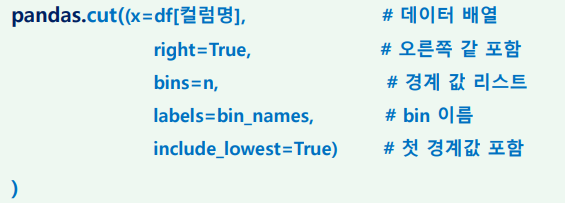

In [250]:
# [5-5] 컬럼별 데이터의 특성 확인 후 자료형 변환 표준화
# -'horsepower' -> 저출력-일반출력-고출력 -> 범주형
# bins : 나눌 구간의 수

pd.cut(mpg_df2['horsepower'],bins=3)

0      (107.333, 168.667]
1      (107.333, 168.667]
2      (107.333, 168.667]
3      (107.333, 168.667]
4      (107.333, 168.667]
              ...        
393     (45.816, 107.333]
394     (45.816, 107.333]
395     (45.816, 107.333]
396     (45.816, 107.333]
397     (45.816, 107.333]
Name: horsepower, Length: 392, dtype: category
Categories (3, interval[float64, right]): [(45.816, 107.333] < (107.333, 168.667] < (168.667, 230.0]]

구간을 보면 왼쪽은 포함이 안 되고 오른쪽은 포함한다

In [251]:
mpg_df2['horsepower'].min() , mpg_df2['horsepower'].max()

# 최소는 46인데 첫 구간의 시작은 45.816
# -> 첫 구간은 포함이 안 되므로 46을 포함시키기 위해

(46, 230)

In [253]:
pd.cut(mpg_df2['horsepower'],
       bins=3,
       labels=['저출력','일반출력','고출력'],
       retbins=True)

# 결과는 Series로 새 column으로 추가 ㅇ

(0      일반출력
 1      일반출력
 2      일반출력
 3      일반출력
 4      일반출력
        ... 
 393     저출력
 394     저출력
 395     저출력
 396     저출력
 397     저출력
 Name: horsepower, Length: 392, dtype: category
 Categories (3, object): ['저출력' < '일반출력' < '고출력'],
 array([ 45.816     , 107.33333333, 168.66666667, 230.        ]))

In [254]:
hp_catg=pd.cut(mpg_df2['horsepower'],
       bins=3,
       labels=['저출력','일반출력','고출력'],
       )

mpg_df2['horsepower_category']=hp_catg

mpg_df2


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kpl,horsepower_category
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,7.652592,일반출력
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,6.377160,일반출력
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,7.652592,일반출력
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,6.802304,일반출력
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,7.227448,일반출력
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,11.478888,저출력
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,18.706336,저출력
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,13.604608,저출력
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,11.904032,저출력


# 문자열 데이터를 분리 시켜주는 기능 => 컬럼 분리

- 조건, 데이터 str 이어야 함
- 형식 : Series.str.메서드()
  - str은 메서드를 사용하기 위함

In [266]:
mpg_df2['car name']

0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
393              ford mustang gl
394                    vw pickup
395                dodge rampage
396                  ford ranger
397                   chevy s-10
Name: car name, Length: 392, dtype: object

In [267]:
mpg_df2['car name'].str.split()

0      [chevrolet, chevelle, malibu]
1              [buick, skylark, 320]
2              [plymouth, satellite]
3                  [amc, rebel, sst]
4                     [ford, torino]
                   ...              
393              [ford, mustang, gl]
394                     [vw, pickup]
395                 [dodge, rampage]
396                   [ford, ranger]
397                    [chevy, s-10]
Name: car name, Length: 392, dtype: object

In [268]:
mpg_df2['car name'].str.split().get(0) # 0번째 원소 들고 나옴

['chevrolet', 'chevelle', 'malibu']

In [269]:
names=mpg_df2['car name'].str.split()

names.head(3)

0    [chevrolet, chevelle, malibu]
1            [buick, skylark, 320]
2            [plymouth, satellite]
Name: car name, dtype: object

In [270]:
names.get(0)

['chevrolet', 'chevelle', 'malibu']

In [272]:
names=mpg_df2['car name'].str.upper()
names

0      CHEVROLET CHEVELLE MALIBU
1              BUICK SKYLARK 320
2             PLYMOUTH SATELLITE
3                  AMC REBEL SST
4                    FORD TORINO
                 ...            
393              FORD MUSTANG GL
394                    VW PICKUP
395                DODGE RAMPAGE
396                  FORD RANGER
397                   CHEVY S-10
Name: car name, Length: 392, dtype: object

In [273]:
names=mpg_df2['car name'].str.upper().str.split()
names

0      [CHEVROLET, CHEVELLE, MALIBU]
1              [BUICK, SKYLARK, 320]
2              [PLYMOUTH, SATELLITE]
3                  [AMC, REBEL, SST]
4                     [FORD, TORINO]
                   ...              
393              [FORD, MUSTANG, GL]
394                     [VW, PICKUP]
395                 [DODGE, RAMPAGE]
396                   [FORD, RANGER]
397                    [CHEVY, S-10]
Name: car name, Length: 392, dtype: object

In [274]:
# 나누어진 문자열을 하나씩 컬럼으로 분리

mpg_df2['car name'].str.split(expand=True)

,0,1,2,3,4,5
0,chevrolet,chevelle,malibu,None,None,None
1,buick,skylark,320,None,None,None
2,plymouth,satellite,None,None,None,None
3,amc,rebel,sst,None,None,None
4,ford,torino,None,None,None,None
...,...,...,...,...,...,...
393,ford,mustang,gl,None,None,None
394,vw,pickup,None,None,None,None
395,dodge,rampage,None,None,None,None
396,ford,ranger,None,None,None,None


In [278]:
names=mpg_df2['car name'].str.split(expand=True, n=2) # 개수를 지정하여 나눌 수 ㅇ

print(names.info)

names



<bound method DataFrame.info of              0          1       2
0    chevrolet   chevelle  malibu
1        buick    skylark     320
2     plymouth  satellite    None
3          amc      rebel     sst
4         ford     torino    None
..         ...        ...     ...
393       ford    mustang      gl
394         vw     pickup    None
395      dodge    rampage    None
396       ford     ranger    None
397      chevy       s-10    None

[392 rows x 3 columns]>


,0,1,2
0,chevrolet,chevelle,malibu
1,buick,skylark,320
2,plymouth,satellite,None
3,amc,rebel,sst
4,ford,torino,None
...,...,...,...
393,ford,mustang,gl
394,vw,pickup,None
395,dodge,rampage,None
396,ford,ranger,None


# DataFrame 연결
- 함수 : pandas.concat([df1,df2,..])

In [279]:
pd.concat([mpg_df,names])

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kpl,0,1,2
0,18.0,8.0,307.0,130,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu,7.652592,NaN,NaN,NaN
1,15.0,8.0,350.0,165,3693.0,11.5,70.0,1.0,buick skylark 320,6.377160,NaN,NaN,NaN
2,18.0,8.0,318.0,150,3436.0,11.0,70.0,1.0,plymouth satellite,7.652592,NaN,NaN,NaN
3,16.0,8.0,304.0,150,3433.0,12.0,70.0,1.0,amc rebel sst,6.802304,NaN,NaN,NaN
4,17.0,8.0,302.0,140,3449.0,10.5,70.0,1.0,ford torino,7.227448,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ford,mustang,gl
394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,vw,pickup,None
395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dodge,rampage,None
396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ford,ranger,None


In [280]:
pd.concat([mpg_df,names],axis=1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kpl,0,1,2
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,7.652592,chevrolet,chevelle,malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,6.377160,buick,skylark,320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,7.652592,plymouth,satellite,None
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,6.802304,amc,rebel,sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,7.227448,ford,torino,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,11.478888,ford,mustang,gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,18.706336,vw,pickup,None
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,13.604608,dodge,rampage,None
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,11.904032,ford,ranger,None


In [281]:
df3=pd.concat([mpg_df,names],axis=1)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
 9   kpl           398 non-null    float64
 10  0             392 non-null    object 
 11  1             390 non-null    object 
 12  2             194 non-null    object 
dtypes: float64(4), int64(4), object(5)
memory usage: 40.5+ KB


In [282]:
df4=pd.concat([mpg_df,names])
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 790 entries, 0 to 397
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    float64
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    float64
 7   origin        398 non-null    float64
 8   car name      398 non-null    object 
 9   kpl           398 non-null    float64
 10  0             392 non-null    object 
 11  1             390 non-null    object 
 12  2             194 non-null    object 
dtypes: float64(8), object(5)
memory usage: 86.4+ KB


In [283]:
df4.iloc[1]

mpg                          15.0
cylinders                     8.0
displacement                350.0
horsepower                    165
weight                     3693.0
acceleration                 11.5
model year                   70.0
origin                        1.0
car name        buick skylark 320
kpl                       6.37716
0                             NaN
1                             NaN
2                             NaN
Name: 1, dtype: object

In [284]:
df4.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kpl,0,1,2
0,18.0,8.0,307.0,130,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu,7.652592,NaN,NaN,NaN
1,15.0,8.0,350.0,165,3693.0,11.5,70.0,1.0,buick skylark 320,6.377160,NaN,NaN,NaN
2,18.0,8.0,318.0,150,3436.0,11.0,70.0,1.0,plymouth satellite,7.652592,NaN,NaN,NaN
3,16.0,8.0,304.0,150,3433.0,12.0,70.0,1.0,amc rebel sst,6.802304,NaN,NaN,NaN
4,17.0,8.0,302.0,140,3449.0,10.5,70.0,1.0,ford torino,7.227448,NaN,NaN,NaN


In [285]:
df4.tail() # 두 번째 397번

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kpl,0,1,2
393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ford,mustang,gl
394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,vw,pickup,None
395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dodge,rampage,None
396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ford,ranger,None
397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chevy,s-10,None


### ignore_index
- 행 방향 연결 시 인덱스 다시 정리 필요
- 매개변수 ignore_index=True

In [286]:
df4=pd.concat([mpg_df,names],ignore_index=True)
df4.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kpl,0,1,2
785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ford,mustang,gl
786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,vw,pickup,None
787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dodge,rampage,None
788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ford,ranger,None
789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chevy,s-10,None
